## Case 2: Gaussian-Gaussian (unknown mu)

In [4]:
import numpy as np
np.set_printoptions(precision=3)
import pandas as pd
pd.set_option('display.precision', 3)
import matplotlib.pyplot as plt

In [1]:
from scipy.stats import norm
import math

#### prior

In [6]:
mu0, sd0 = 80, 6
norm_prior = norm(mu0, sd0)

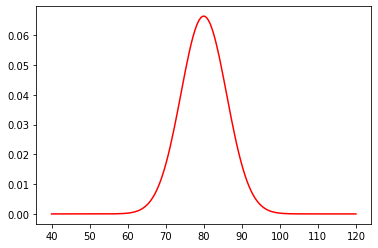

In [8]:
xx = np.linspace(40, 120, 160)
prior_pdf = norm_prior.pdf(xx)
plt.plot(xx, prior_pdf, color = 'r')

#### sampling density

In [9]:
mean, sd, n = 60, 4, 30

np.random.seed(730)
data = norm.rvs(mean, sd, size = n)
print(data)

[55.658 55.777 55.351 57.473 56.194 56.388 56.019 57.12  61.205 57.816
 63.818 63.275 56.98  58.085 65.934 56.046 63.037 62.018 58.254 62.254
 64.479 63.563 53.529 56.108 70.416 62.445 55.568 59.406 55.24  57.586]


In [12]:
def likelihood(D,x):
    mu = np.mean(D)
    sigmasq = np.var(D)
    return np. exp(((x-mu)**2)/(-2*sigmasq))

Text(0.5, 0, 'theta')

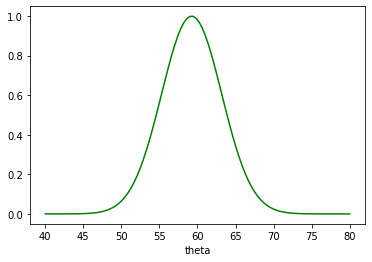

In [14]:
theta = np.linspace(40, 80, 100)
plt.plot(theta, likelihood(data, theta), color='g')
plt.xlabel("theta")

#### Posterior

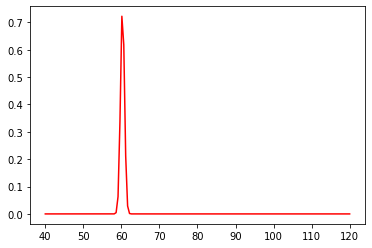

In [15]:
mun = (mu0 * (1/sd0**2) + mean * (n/sd**2)) / (1/ sd0**2 + n/sd**2)
sdn = 1/((1/sd0**2) + n/sd**2)

norm_post = norm(mun, sdn)
xx = np.linspace(40, 120, 160)
post_pdf = norm_post.pdf(xx)
plt.plot(xx, post_pdf, color='r')

[Text(0.5, 0, 'theta'), Text(0.5, 1.0, 'posterior')]

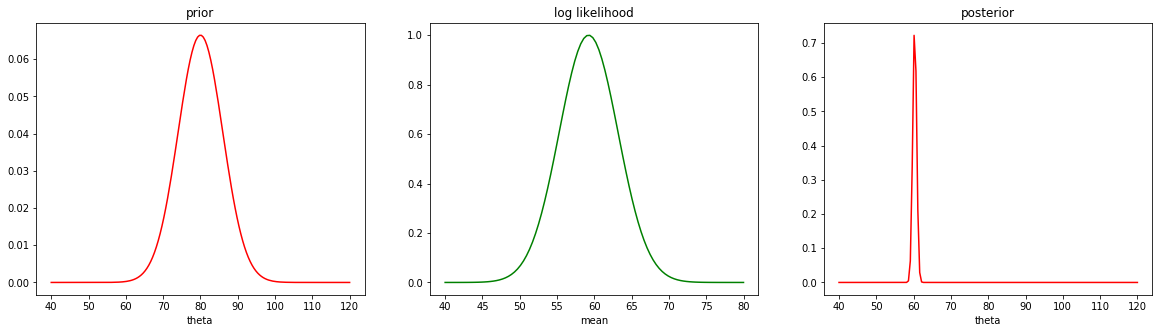

In [18]:
fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(131)
ax1.plot(xx, prior_pdf, color='r')
ax1.set(title = "prior", xlabel = "theta")

ax2 = fig.add_subplot(132)
ax2.plot(theta, likelihood(data, theta), color='g')
ax2.set(title='log likelihood', xlabel="theta")
ax2.set_xlabel('mean')

ax3 = fig.add_subplot(133)
ax3.plot(xx, post_pdf, color='r')
ax3.set(title='posterior', xlabel='theta')